In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [2]:
import celltypist
from celltypist import models

In [3]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Endothelial/")

In [4]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.bbknn_umap_leiden_marker.res0.3.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [5]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


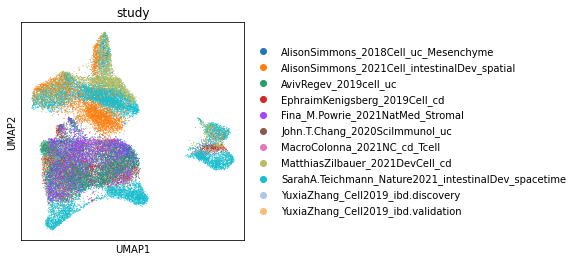

In [6]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["study"])

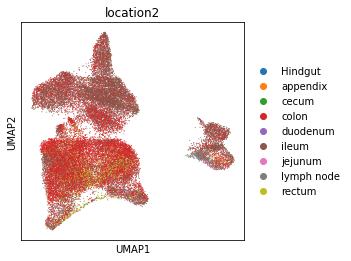

In [7]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["location2"])

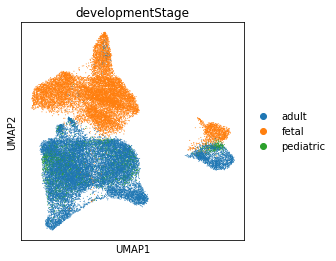

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["developmentStage"])

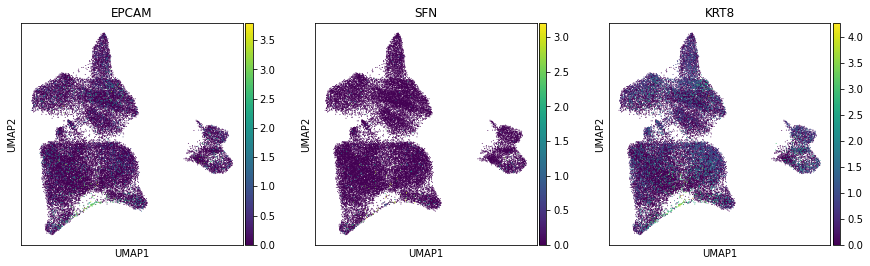

In [40]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = ['EPCAM',"SFN","KRT8"], legend_loc = 'on data')

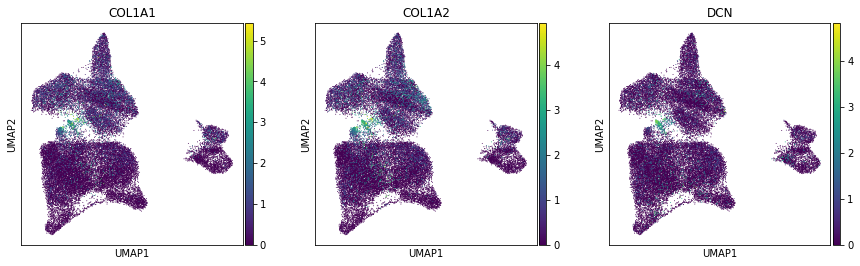

In [42]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = ['COL1A1',"COL1A2","DCN"], legend_loc = 'on data')

# resolution = 0.3

In [34]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.bbknn_umap_leiden_marker.res0.3.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

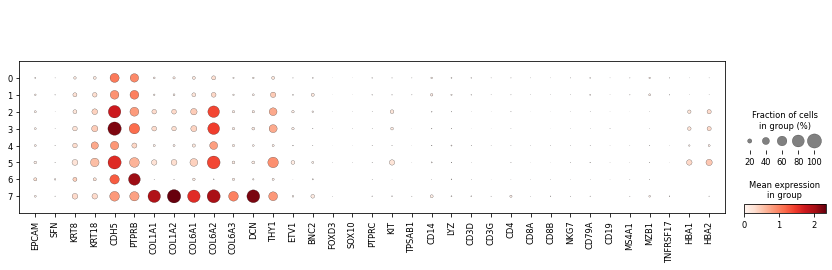

In [35]:
major_markers = ["EPCAM","SFN","KRT8","KRT18", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "HBA1","HBA2"
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden');

In [36]:
predictions = celltypist.annotate(adata, model = 'Cells_Intestinal_Tract.pkl', majority_voting = True, over_clustering = 'leiden')

👀 Detected scaled expression in the input data, will try the `.raw` attribute
🔬 Input data has 34167 cells and 15800 genes
🔗 Matching reference genes in the model
🧬 3227 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [37]:
adata = predictions.to_adata()

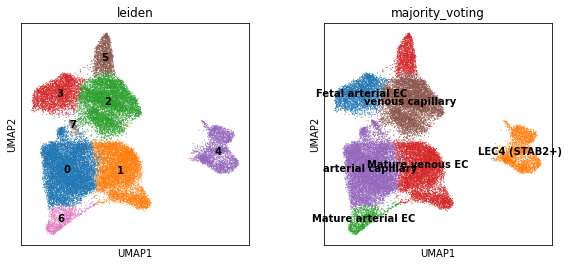

In [38]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = ['leiden', 'majority_voting'], legend_loc = 'on data')

# resolution = 0.6

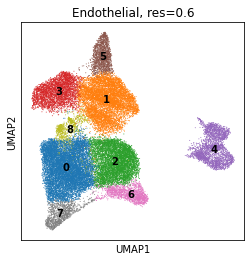

In [15]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.bbknn_umap_leiden_marker.res0.6.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Endothelial, res=0.6', frameon=True, legend_fontsize = 10)

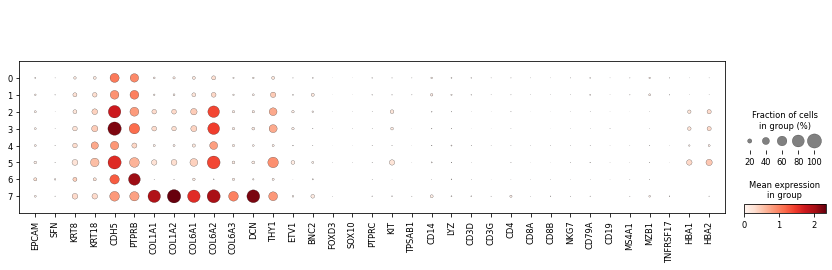

In [33]:
major_markers = ["EPCAM","SFN","KRT8","KRT18", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "HBA1","HBA2"
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden');

# resolution = 0.9

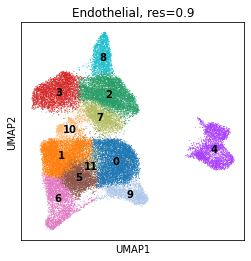

In [17]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.bbknn_umap_leiden_marker.res0.9.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Endothelial, res=0.9', frameon=True, legend_fontsize = 10)

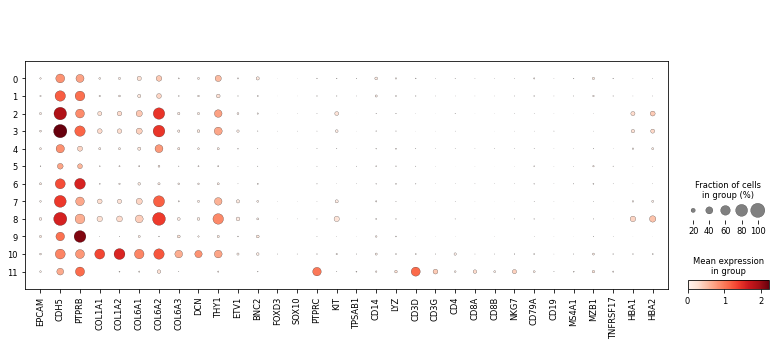

In [18]:
major_markers = ["EPCAM", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "HBA1","HBA2"
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden');

# resolution = 1.2

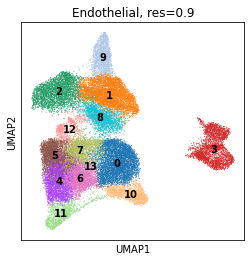

In [19]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.bbknn_umap_leiden_marker.res1.2.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Endothelial, res=0.9', frameon=True, legend_fontsize = 10)

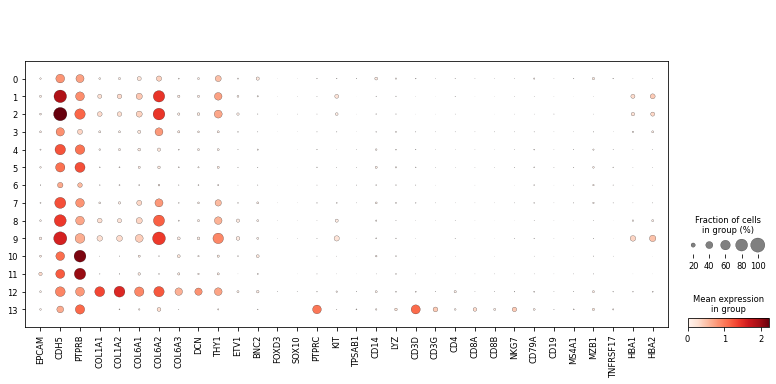

In [20]:
major_markers = ["EPCAM", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "HBA1","HBA2"
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden');

# resolution = 1.5

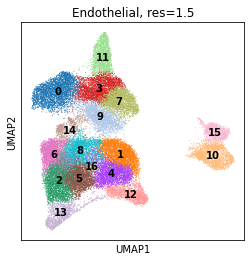

In [21]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.bbknn_umap_leiden_marker.res1.5.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Endothelial, res=1.5', frameon=True, legend_fontsize = 10)

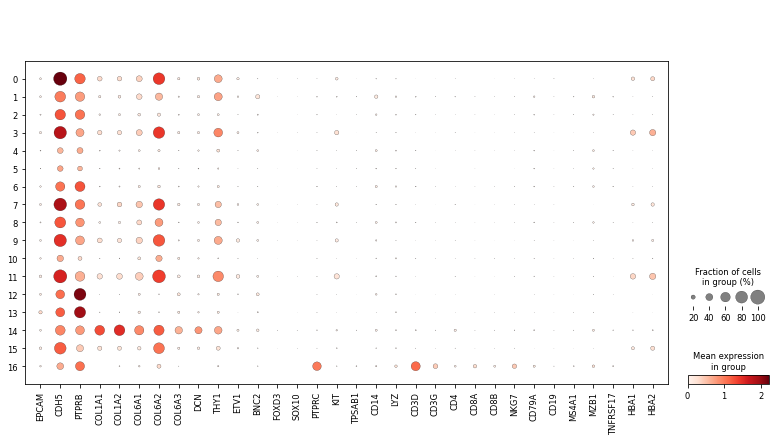

In [22]:
major_markers = ["EPCAM", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "HBA1","HBA2"
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden');

In [23]:
## done